# Interactive Visualization 

Exploring Temperature and Humidity Data

1. Use Residencial Data to Create Time Series 
    + Resample Time Series 
    + Visualize Time Series
* Use Official Weather Data to Create Time Series


In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

    
import pandas as pd
import datetime
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
plotly.offline.init_notebook_mode(connected=True)

from scripts.plot import bohek_slider
from scripts.data import deutsches_wetterdienst, braunschweig
from scripts.plot import plotly_dwd
from scripts.plot import plotly_home
from scripts.plot import bohek_slider
from bokeh.io import output_notebook
from bokeh.io import show

import altair as alt
alt.renderers.enable('notebook') # once per session

RendererRegistry.enable('notebook')

## Use Residencial Data to Create Time Series 

### The Residencial Data Set

This data contains humidity (in percentage) and temperature (in degrees Celsius). The data was collected using four S300 TH devices inside a residence in Braunschweig, Germany during the years 2013-2017. 

There are 4 sensors, positioned in different locations:  outside on the balcony, kitchen, bathroom, and living room. 

Each of the 4 sensors produced temperature and humidity data. The data from sensor 1 is labeled: Temp1 and Humi1; data from sensor 2 is labeled Temp2 and Humi2 ... and so on.


### Creating Time Series with Pandas Datetime

A time series is a sequence of data points indexed (or listed) in temporal order. 

Pandas datetime contains extensive capabilities and features for working with time series data.

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html?highlight=datetime

Have a look at the braunschweig() function inside the data.py script to see how the time series was created.

In [2]:
home = braunschweig('data/raw.data')
home.head(10)

,Temp1,Temp2,Temp3,Temp4,Temp8,Humi1,Humi2,Humi3,Humi4
datetime,,,,,,,,,
2013-04-14 07:44:23,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:44:30,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:45:37,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:46:03,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:46:19,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:47:19,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:47:26,10.1,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:50:14,10.2,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0
2013-04-14 07:50:22,10.2,19.6,23.0,20.2,12.2,76.0,42.0,34.0,40.0


## Resample Time Series

Notice that sometimes there are multiple readings per second. Lets resample the data to make the frequency for each
reading equal to a calendar day (abbreviated as D). 


More Resampling Abbreviations: 

http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects


The  ffill() function tells us to replace null if they occur as a result of the resampling by copying the non-null value that occurred before the null In this case the nearest value is used. Other predefined fill methods are: 


More Functions to Handle Resampling Nulls:

https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html#upsampling

In [3]:
## Exercise 
frequency = 'D'
home = home.resample(frequency).mean().ffill()
home.head()

,Temp1,Temp2,Temp3,Temp4,Temp8,Humi1,Humi2,Humi3,Humi4
datetime,,,,,,,,,
2013-04-14,15.696051,19.860450,23.692588,20.733840,16.897813,70.401580,47.047995,37.205954,44.666464
2013-04-15,17.653432,20.365598,21.085450,21.015988,16.734402,65.504316,50.438142,47.623510,47.817509
2013-04-16,16.500497,20.450207,20.310927,21.164996,15.867508,66.577815,50.214404,50.812500,48.237365
2013-04-17,16.010161,20.236791,19.731583,20.912616,15.809272,64.488569,49.231160,50.230737,47.296359
2013-04-18,17.064194,20.245818,20.180305,21.182530,15.878121,53.960445,44.769674,44.257520,43.027606


## Visualize Time Series

Not all sensors are in operation throughout the period, so data is missing.

Also, in 2017, the residents moved to a new flat.  A visual inspection of the data reveals that the outside sensor, Temp1, became an inside sensor when the apartment changed. 

Can you detect when the Sensor 1 changed location ?

In [5]:
fig = plotly_home(home)
plotly.offline.iplot(fig)

## Use Official Weather Data to Create Time Series

### The Official Wheather Data Set

Given the gaps in the data, the residencial readingy might be problematic for further analysis. 

Deutsches Wetterdienst data set contains temperature and humidity readings in Braunschweig Germany  during the years Jan 1951- Dec 2017. A subset of from 2013 - 2017 is loaded using the deutsches_wetterdienst() script.

What can you say about the data from the Deutsches Wetterdienst?

In [7]:
df = deutsches_wetterdienst('data/produkt_tu_stunde_19510101_20171231_00662.txt',2000,2017)

# resample
frequency = 'D'
df = df.resample(frequency).mean().ffill()

# plot
fig = plotly_dwd(df)
plotly.offline.iplot(fig)

## TODO : remove the default years

### Overlay Residencial Data with Official Weather Data
Lets compare the home readings with an official data source from the Deutsches Wetterdienst.

### How Cool Is That! 

It looks like the sensor data we collected with our Raspberry Pis overlaps nicely with the offical wheather data... well, up to the point ...  

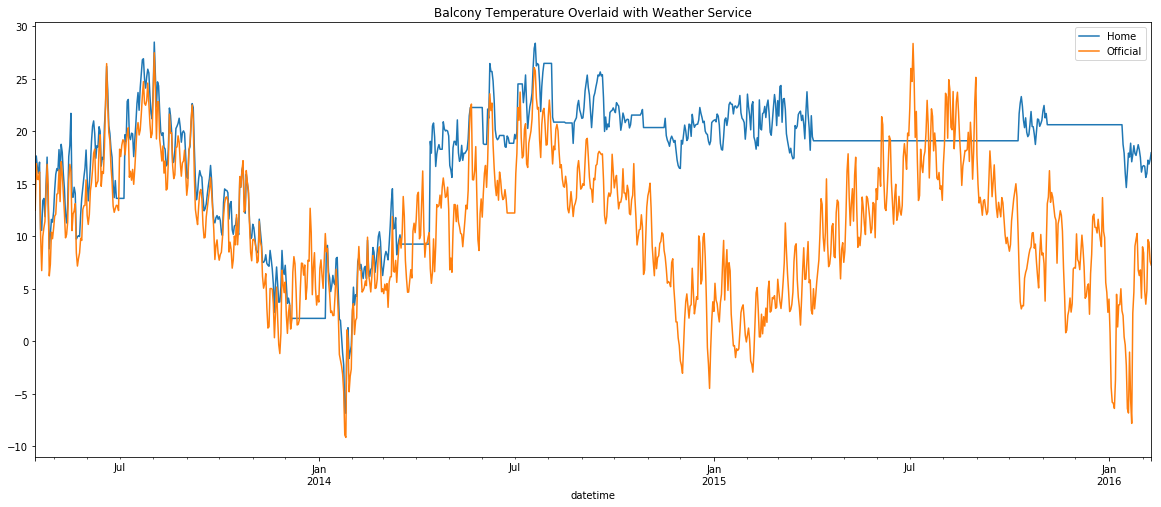

In [8]:
# join the residencial and offical data sets
joined = df.join(home)

# drop nulls
joined.dropna(inplace=True)    

# plot and relab
joined.loc[:,['Temp1','Temp']].rename(columns={'Temp': "Official",'Temp1': "Home"}).plot(figsize=(20,8), title='Balcony Temperature Overlaid with Weather Service')

Altair

In [5]:
home.head()

,Temp1,Temp2,Temp3,Temp4,Temp8,Humi1,Humi2,Humi3,Humi4
datetime,,,,,,,,,
2013-04-14,15.696051,19.860450,23.692588,20.733840,16.897813,70.401580,47.047995,37.205954,44.666464
2013-04-15,17.653432,20.365598,21.085450,21.015988,16.734402,65.504316,50.438142,47.623510,47.817509
2013-04-16,16.500497,20.450207,20.310927,21.164996,15.867508,66.577815,50.214404,50.812500,48.237365
2013-04-17,16.010161,20.236791,19.731583,20.912616,15.809272,64.488569,49.231160,50.230737,47.296359
2013-04-18,17.064194,20.245818,20.180305,21.182530,15.878121,53.960445,44.769674,44.257520,43.027606


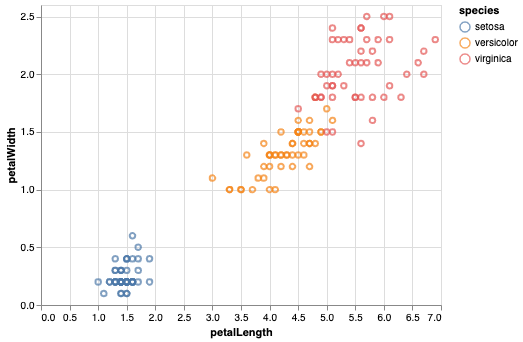

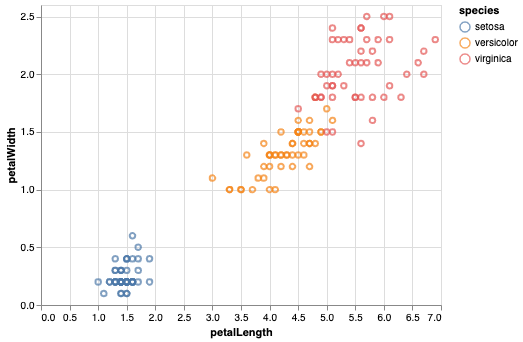

In [2]:
import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

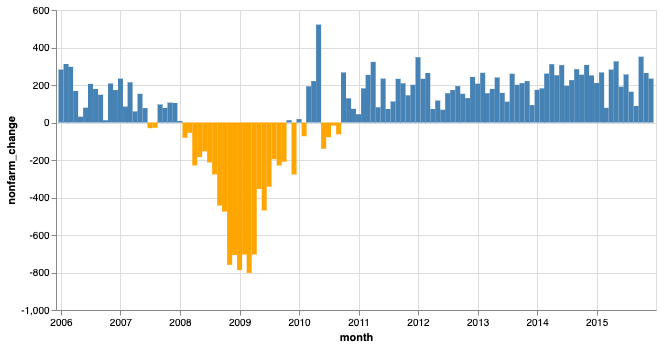

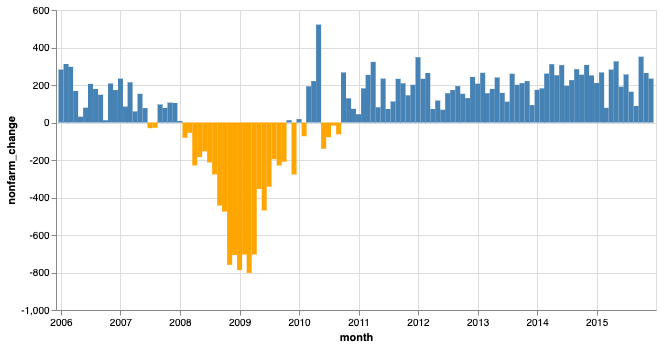

In [4]:
import altair as alt
from vega_datasets import data

source = data.us_employment()

alt.Chart(source).mark_bar().encode(
    x="month:T",
    y="nonfarm_change:Q",
    color=alt.condition(
        alt.datum.nonfarm_change > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
).properties(width=600)

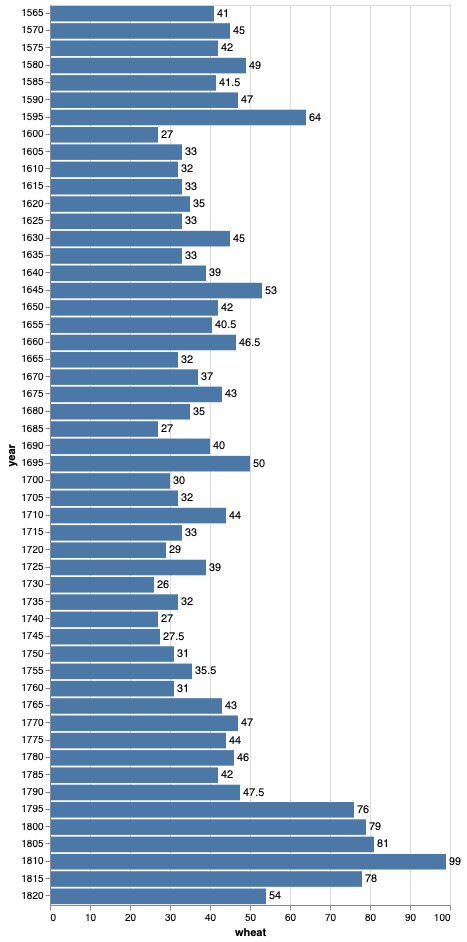

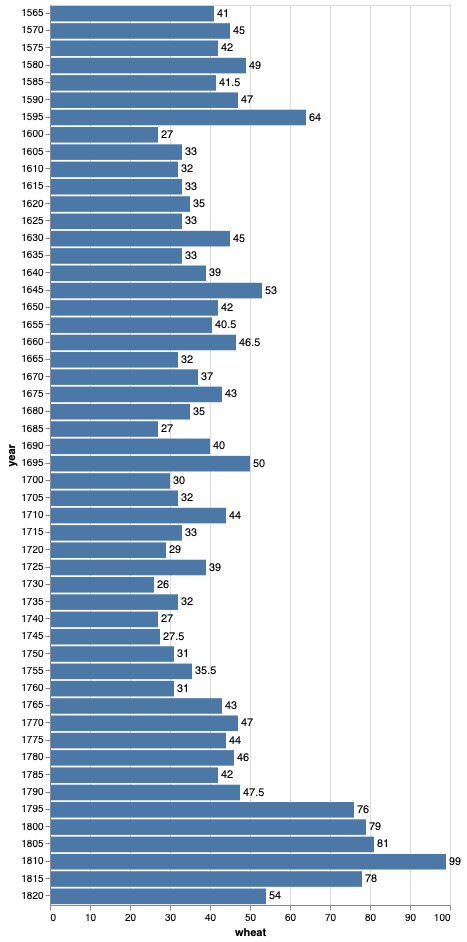

In [9]:
import altair as alt
from vega_datasets import data

source = data.wheat()

bars = alt.Chart(source).mark_bar().encode(
    x='wheat:Q',
    y="year:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='wheat:Q'
)

(bars + text).properties(height=900)